In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import tensorflow as tf
import re
from tensorflow.keras.layers import (Dense,Flatten,SimpleRNN,InputLayer,Conv1D,Bidirectional,GRU,LSTM,BatchNormalization,Dropout,Input, Embedding,TextVectorization)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/sample_submission.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/test.csv')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/train.csv')

In [ ]:
df2

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [ ]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
3258    0
3259    0
3260    0
3261    0
3262    0
Name: target, Length: 3263, dtype: int64

In [ ]:
df2

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


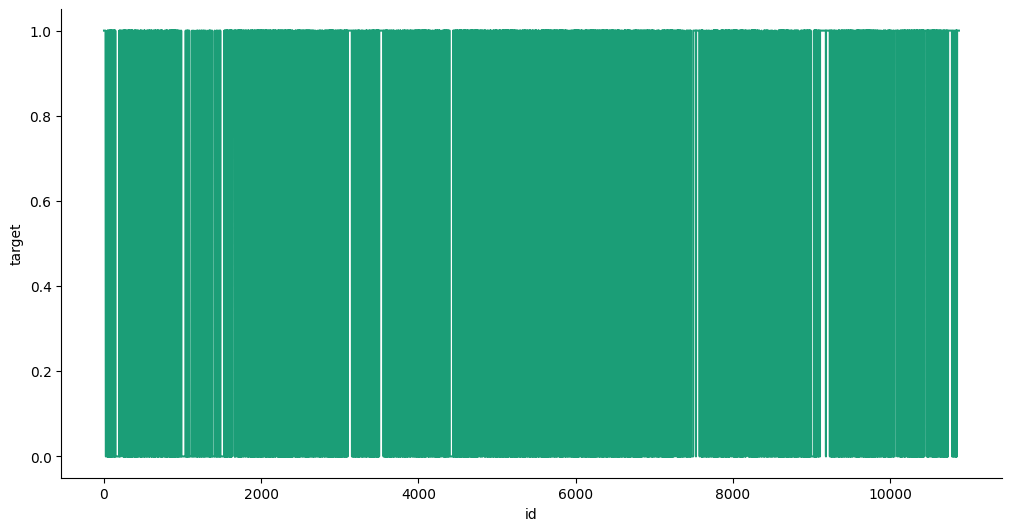

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['target']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('target')

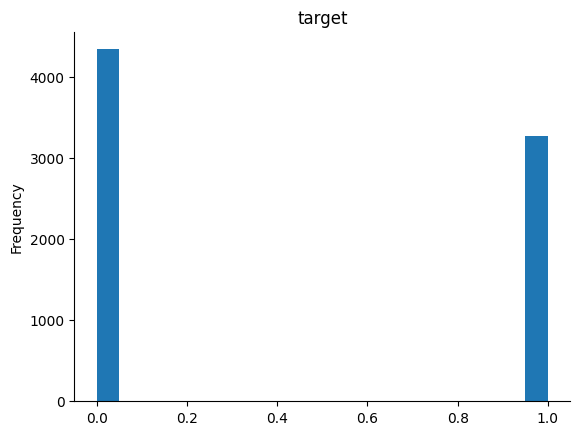

In [ ]:
from matplotlib import pyplot as plt
df2['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df2

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
df2['text'] = df2['text'].apply(lambda x: x.lower())
df1['text'] = df1['text'].apply(lambda x: x.lower())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['keyword'] =le.fit_transform(df2['keyword'])
df2['location'] =le.fit_transform(df2['location'])
df1['keyword'] =le.fit_transform(df1['keyword'])
df1['location'] =le.fit_transform(df1['location'])
df2

,id,keyword,location,text,target
0,1,221,3341,our deeds are the reason of this #earthquake m...,1
1,4,221,3341,forest fire near la ronge sask. canada,1
2,5,221,3341,all residents asked to 'shelter in place' are ...,1
3,6,221,3341,"13,000 people receive #wildfires evacuation or...",1
4,7,221,3341,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,221,3341,two giant cranes holding a bridge collapse int...,1
7609,10870,221,3341,@aria_ahrary @thetawniest the out of control w...,1
7610,10871,221,3341,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1
7611,10872,221,3341,police investigating after an e-bike collided ...,1


In [ ]:
import re
import pandas as pd

def remove_special_symbols_and_words(text):
    if isinstance(text, str):
        # Define a regular expression pattern to match special symbols and words starting with '@'
        pattern = r'[@#&$%*!^]+'  # This pattern matches words starting with '@' and some common special symbols
        pattern_alphanumeric = r'[^a-zA-Z0-9\s]'

        # Use re.sub to replace the matched patterns with an empty string
        cleaned_text = re.sub(pattern, '', text)
        cleaned_text = re.sub(pattern_alphanumeric, '', cleaned_text)

        return cleaned_text
    else:
        return text

# Assuming df2 is your DataFrame
df2['text'] = df2['text'].apply(remove_special_symbols_and_words)


In [ ]:
# df4

In [ ]:
df2

,id,keyword,location,text,target
0,1,221,3341,our deeds are the reason of this earthquake ma...,1
1,4,221,3341,forest fire near la ronge sask canada,1
2,5,221,3341,all residents asked to shelter in place are be...,1
3,6,221,3341,13000 people receive wildfires evacuation orde...,1
4,7,221,3341,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,221,3341,two giant cranes holding a bridge collapse int...,1
7609,10870,221,3341,ariaahrary thetawniest the out of control wild...,1
7610,10871,221,3341,m194 0104 utc5km s of volcano hawaii httptcozd...,1
7611,10872,221,3341,police investigating after an ebike collided w...,1


In [ ]:
df2['text'] = df2['text'].apply(remove_special_symbols_and_words)
df2['text']
df1['text'] = df1['text'].apply(remove_special_symbols_and_words)


In [ ]:
df2

,id,keyword,location,text,target
0,1,221,3341,our deeds are the reason of this earthquake ma...,1
1,4,221,3341,forest fire near la ronge sask canada,1
2,5,221,3341,all residents asked to shelter in place are be...,1
3,6,221,3341,13000 people receive wildfires evacuation orde...,1
4,7,221,3341,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,221,3341,two giant cranes holding a bridge collapse int...,1
7609,10870,221,3341,ariaahrary thetawniest the out of control wild...,1
7610,10871,221,3341,m194 0104 utc5km s of volcano hawaii httptcozd...,1
7611,10872,221,3341,police investigating after an ebike collided w...,1


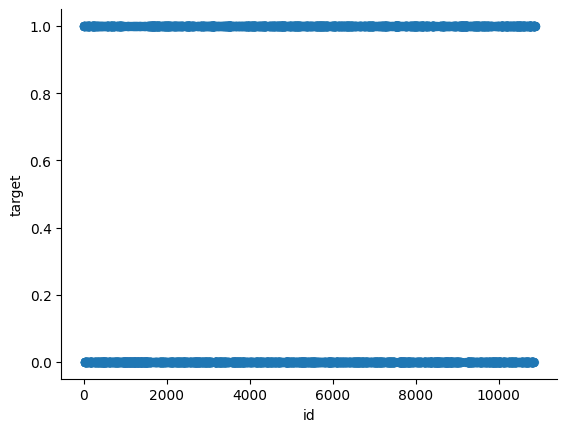

In [ ]:
from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='id', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# data = {'text': ["Stemming is the process.", "Tokenization is important."]}
df2['text'] = pd.DataFrame(df2['text'])
df1['text'] = pd.DataFrame(df1['text'])

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming to each row in the 'text' column
df2['text'] = df2['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in word_tokenize(x)]))
df1['text'] = df1['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in word_tokenize(x)]))


In [ ]:
df2

,id,keyword,location,text,target
0,1,221,3341,our deed are the reason of thi earthquak may a...,1
1,4,221,3341,forest fire near la rong sask canada,1
2,5,221,3341,all resid ask to shelter in place are be notif...,1
3,6,221,3341,13000 peopl receiv wildfir evacu order in cali...,1
4,7,221,3341,just got sent thi photo from rubi alaska as sm...,1
...,...,...,...,...,...
7608,10869,221,3341,two giant crane hold a bridg collaps into near...,1
7609,10870,221,3341,ariaahrari thetawniest the out of control wild...,1
7610,10871,221,3341,m194 0104 utc5km s of volcano hawaii httptcozd...,1
7611,10872,221,3341,polic investig after an ebik collid with a car...,1


In [ ]:
df2['text']

0       our deed are the reason of thi earthquak may a...
1                    forest fire near la rong sask canada
2       all resid ask to shelter in place are be notif...
3       13000 peopl receiv wildfir evacu order in cali...
4       just got sent thi photo from rubi alaska as sm...
                              ...                        
7608    two giant crane hold a bridg collaps into near...
7609    ariaahrari thetawniest the out of control wild...
7610    m194 0104 utc5km s of volcano hawaii httptcozd...
7611    polic investig after an ebik collid with a car...
7612    the latest more home raze by northern californ...
Name: text, Length: 7613, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the necessary data for tokenization
nltk.download('wordnet')
# data = {'text': ["Lemmatization is the process.", "Tokenization is important."]}
df2['text'] = pd.DataFrame(df2['text'])
df1['text'] = pd.DataFrame(df1['text'])
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each row in the 'text' column
df2['text'] = df2['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df1['text'] = df1['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
from tqdm import tqdm
import nltk
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

preprocessed_review = preprocess_text(df2['text'].values)
df2['text'] = preprocessed_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 7613/7613 [00:12<00:00, 590.81it/s]


In [ ]:
df2['text']

0            deed reason thi earthquak may allah forgiv u
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3       13000 peopl receiv wildfir evacu order california
4       got sent thi photo rubi alaska smoke wildfir p...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    ariaahrari thetawniest control wild fire calif...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Name: text, Length: 7613, dtype: object

In [ ]:
df2

,id,keyword,location,text,target
0,1,221,3341,deed reason thi earthquak may allah forgiv u,1
1,4,221,3341,forest fire near la rong sask canada,1
2,5,221,3341,resid ask shelter place notifi offic evacu she...,1
3,6,221,3341,13000 peopl receiv wildfir evacu order california,1
4,7,221,3341,got sent thi photo rubi alaska smoke wildfir p...,1
...,...,...,...,...,...
7608,10869,221,3341,two giant crane hold bridg collaps nearbi home...,1
7609,10870,221,3341,ariaahrari thetawniest control wild fire calif...,1
7610,10871,221,3341,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1
7611,10872,221,3341,polic investig ebik collid car littl portug eb...,1


In [ ]:
# from transformers import BertTokenizer, BertModel
# import torch
# import pandas as pd

# # Load pre-trained BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Sample DataFrame
# # data = {'text': ["13000 people receive wildfire evacuation order in California",
# #                  "Just got sent this photo from Ruby Alaska, smoke from wildfire pouring into a school",
# #                  "Rocky Fire update: California Hwy 20 closed in both directions due to Lake County fire CAfire wildfire",
# #                  # ... (your other text samples)
# #                  ]}
# # df = pd.DataFrame(data)

# # Tokenize and get BERT embeddings
# def get_bert_embeddings(text):
#     tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
#     with torch.no_grad():
#         outputs = model(**tokens)
#     return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# # Apply BERT embeddings to each row in the 'text' column
# df2['bert_embeddings'] = df2['text'].apply(get_bert_embeddings)

# # Now, df['bert_embeddings'] contains BERT embeddings for each text sample


In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

# Sample DataFrame
# data = {'text': ["13000 people receive wildfire evacuation order in California",
#                  "Just got sent this photo from Ruby Alaska, smoke from wildfire pouring into a school",
#                  "Rocky Fire update: California Hwy 20 closed in both directions due to Lake County fire CAfire wildfire",
#                  # ... (your other text samples)
#                  ]}
# df = pd.DataFrame(data)

# Tokenize the sentences
tokenized_texts = df2['text'].apply(word_tokenize)

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Function to get sentence embeddings
def get_sentence_embedding(tokens, model):
    # Filter out tokens that are not in the vocabulary
    valid_tokens = [token for token in tokens if token in model.wv]

    if not valid_tokens:
        # Return a vector of zeros if none of the tokens are in the vocabulary
        return [0.0] * model.vector_size

    # Take the mean of the word vectors to get the sentence vector
    sentence_vector = sum(model.wv[token] for token in valid_tokens) / len(valid_tokens)

    return sentence_vector

# Get word embeddings for each sentence
df2['word_embeddings'] = tokenized_texts.apply(lambda x: get_sentence_embedding(x, model))

# Now, df['word_embeddings'] contains Word2Vec embeddings for each sentence


In [ ]:


df2

,id,keyword,location,text,target,word_embeddings
0,1,221,3341,deed reason thi earthquak may allah forgiv u,1,"[-0.09005168, 0.15451299, 0.021717582, -0.0042..."
1,4,221,3341,forest fire near la rong sask canada,1,"[-0.06277066, 0.11148196, 0.01714352, -0.00816..."
2,5,221,3341,resid ask shelter place notifi offic evacu she...,1,"[-0.03753812, 0.06570772, 0.0064938846, -0.003..."
3,6,221,3341,13000 peopl receiv wildfir evacu order california,1,"[-0.08722524, 0.15895577, 0.016090581, -0.0094..."
4,7,221,3341,got sent thi photo rubi alaska smoke wildfir p...,1,"[-0.07142157, 0.12737843, 0.01850907, -0.00707..."
...,...,...,...,...,...,...
7608,10869,221,3341,two giant crane hold bridg collaps nearbi home...,1,"[-0.060920384, 0.10769306, 0.020160029, -0.009..."
7609,10870,221,3341,ariaahrari thetawniest control wild fire calif...,1,"[-0.06684477, 0.11859897, 0.013450559, -0.0100..."
7610,10871,221,3341,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1,"[-0.009451547, 0.016254319, -0.001006113, -0.0..."
7611,10872,221,3341,polic investig ebik collid car littl portug eb...,1,"[-0.04918147, 0.0867097, 0.012448971, -0.00739..."


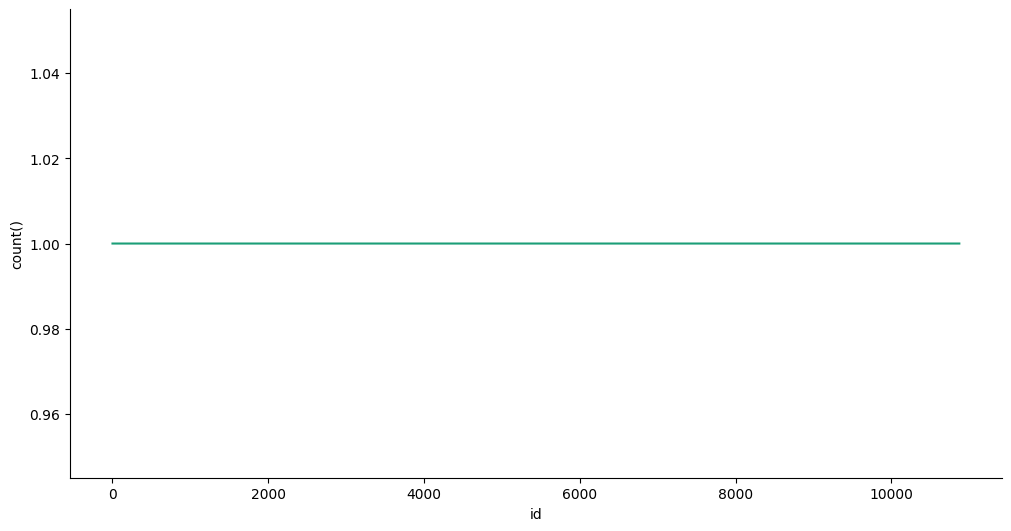

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

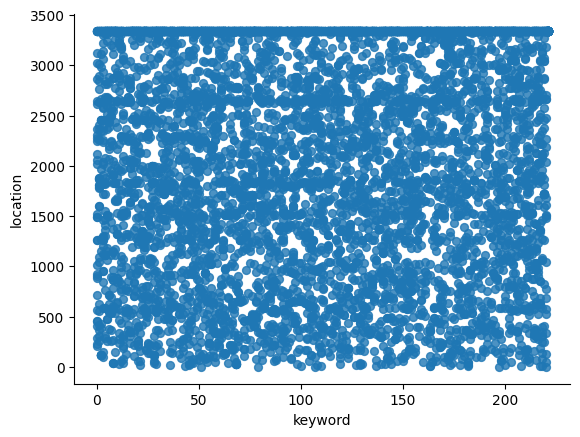

In [ ]:
from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='keyword', y='location', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

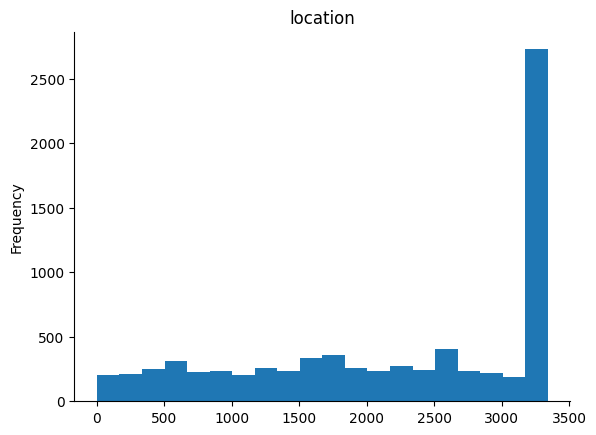

In [ ]:
from matplotlib import pyplot as plt
df2['location'].plot(kind='hist', bins=20, title='location')
plt.gca().spines[['top', 'right',]].set_visible(False)

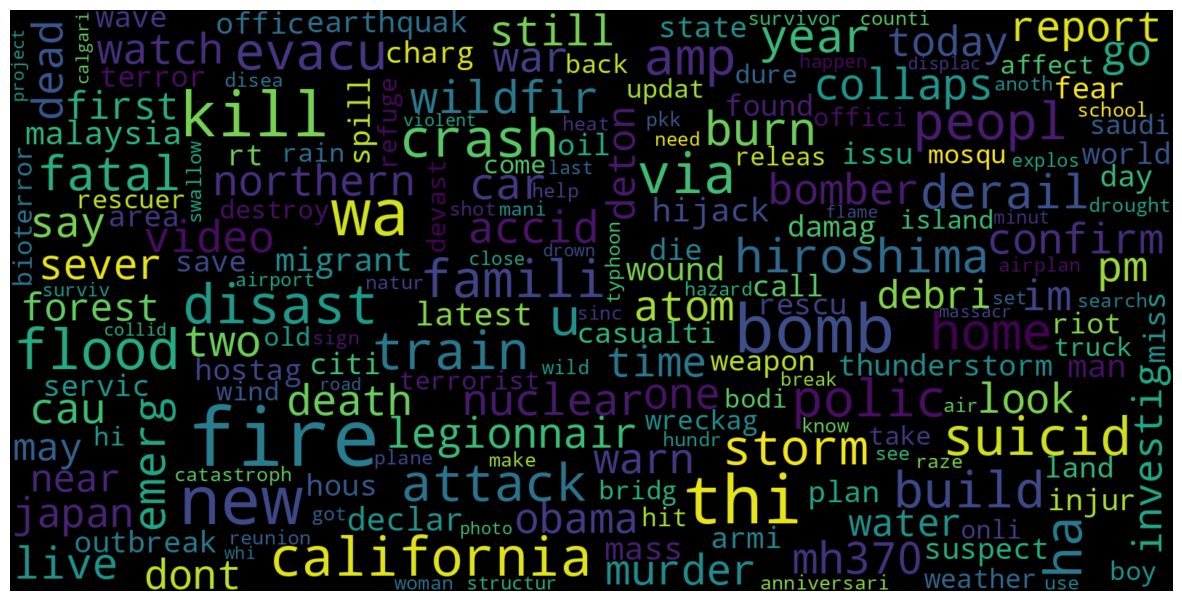

In [ ]:
from wordcloud import WordCloud
consolidated = ' '.join(
    word for word in df2['text'][df2['target'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

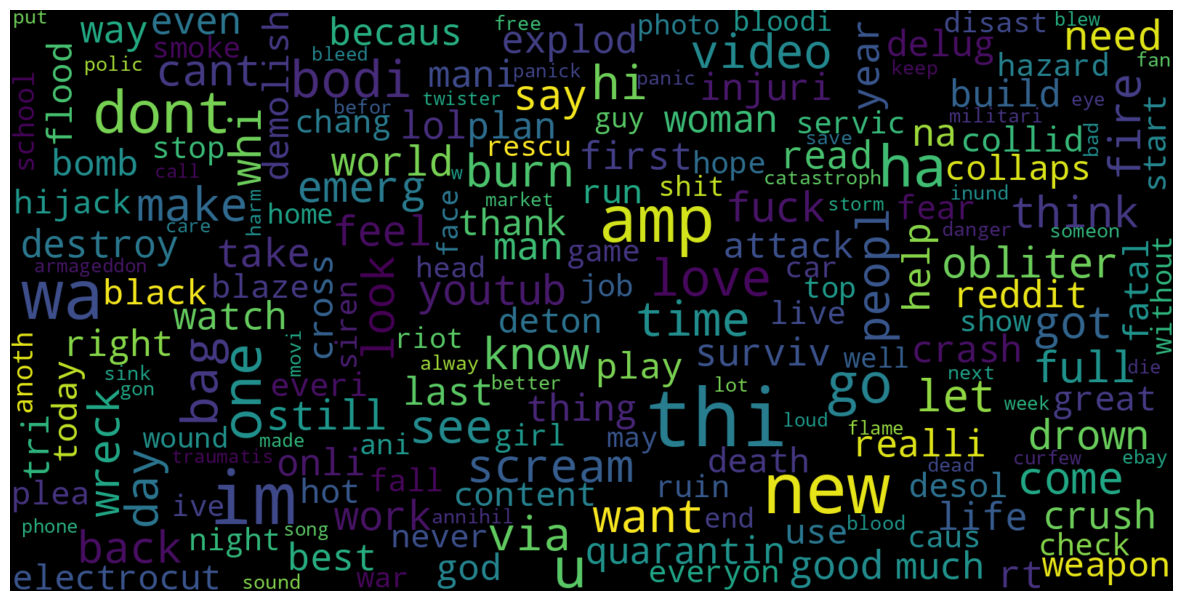

In [ ]:
consolidated = ' '.join(
    word for word in df2['text'][df2['target'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df2['word_embeddings'].shape

(7613,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
# Assuming 'corpus' is a list of text documents
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df2['text'])
y = df2['target']
# Vocabulary size
vocab_size = len(vectorizer.get_feature_names_out())
preprocessed_review = preprocess_text(df2['text'].values)
df2['text'] = preprocessed_review

100%|██████████| 7613/7613 [00:23<00:00, 330.03it/s]


In [ ]:
vocab_size

19104

In [ ]:
input_size = X.shape[1]

In [ ]:
output_size = len(np.unique(y))

In [ ]:
df2

,id,keyword,location,text,target,word_embeddings
0,1,221,3341,deed reason thi earthquak may allah forgiv u,1,"[-0.09005168, 0.15451299, 0.021717582, -0.0042..."
1,4,221,3341,forest fire near la rong sask canada,1,"[-0.06277066, 0.11148196, 0.01714352, -0.00816..."
2,5,221,3341,resid ask shelter place notifi offic evacu she...,1,"[-0.03753812, 0.06570772, 0.0064938846, -0.003..."
3,6,221,3341,13000 peopl receiv wildfir evacu order california,1,"[-0.08722524, 0.15895577, 0.016090581, -0.0094..."
4,7,221,3341,got sent thi photo rubi alaska smoke wildfir p...,1,"[-0.07142157, 0.12737843, 0.01850907, -0.00707..."
...,...,...,...,...,...,...
7608,10869,221,3341,two giant crane hold bridg collaps nearbi home...,1,"[-0.060920384, 0.10769306, 0.020160029, -0.009..."
7609,10870,221,3341,ariaahrari thetawniest control wild fire calif...,1,"[-0.06684477, 0.11859897, 0.013450559, -0.0100..."
7610,10871,221,3341,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1,"[-0.009451547, 0.016254319, -0.001006113, -0.0..."
7611,10872,221,3341,polic investig ebik collid car littl portug eb...,1,"[-0.04918147, 0.0867097, 0.012448971, -0.00739..."


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, Bidirectional, LSTM, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Assuming df2 is your DataFrame
# Assuming 'text' is your feature, and 'target' is the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['target'], test_size=0.3, random_state=42)

# Tokenize and pad sequences for word embeddings
max_len = 50
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# BERT tokenization
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_bert = np.array([tokenizer_bert.encode(text, add_special_tokens=True) for text in tqdm(X_train)])
X_test_bert = np.array([tokenizer_bert.encode(text, add_special_tokens=True) for text in tqdm(X_test)])

# Pad BERT sequences
max_len_bert = max(len(seq) for seq in np.concatenate([X_train_bert, X_test_bert], axis=0))
X_train_bert = pad_sequences(X_train_bert, maxlen=max_len_bert, dtype="long", value=0, truncating="post", padding="post")
X_test_bert = pad_sequences(X_test_bert, maxlen=max_len_bert, dtype="long", value=0, truncating="post", padding="post")

# Build the word embedding model
word_embedding_model = tf.keras.Sequential()
word_embedding_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len))
word_embedding_model.add(Flatten())

# Build the TF-IDF model
tfidf_model = tf.keras.Sequential()
tfidf_model.add(Dense(50, input_dim=X_train_tfidf.shape[1], activation='relu'))

# Build the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
input_ids = Input(shape=(max_len_bert,), dtype=tf.int32, name="input_ids")
outputs = bert_model(input_ids)['last_hidden_state']
bert_model = Model(inputs=input_ids, outputs=outputs)

# Build the BiLSTM model
bi_lstm_model = tf.keras.Sequential()
bi_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(max_len, 1)))
bi_lstm_model.add(TimeDistributed(Dense(50)))
bi_lstm_model.add(Flatten())

# Concatenate the outputs of all models
concatenated_layer = Concatenate()([word_embedding_model.output, tfidf_model.output, bert_model.output[:, 0, :], bi_lstm_model.output])

# Additional layers
dropout_layer = Dropout(0.5)(concatenated_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Create the combined model
combined_model = tf.keras.Model(inputs=[word_embedding_model.input, tfidf_model.input, input_ids, bi_lstm_model.input], outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
combined_model.summary()

# Train the model
combined_model.fit([X_train_padded, X_train_tfidf, X_train_bert, np.expand_dims(X_train_padded, axis=-1)], y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = combined_model.evaluate([X_test_padded, X_test_tfidf, X_test_bert, np.expand_dims(X_test_padded, axis=-1)], y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


100%|██████████| 5329/5329 [00:04<00:00, 1305.02it/s]
<ipython-input-125-620738524a43>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_bert = np.array([tokenizer_bert.encode(text, add_special_tokens=True) for text in tqdm(X_train)])
100%|██████████| 2284/2284 [00:02<00:00, 857.64it/s] 
<ipython-input-125-620738524a43>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_bert = np.array([tokenizer_bert.encode(text, add_special_tokens=True) for text in tqdm(X_test)])
Some weights of the PyTorch model were not used when initializing the TF

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 bidirectional_14_input (In  [(None, 50, 1)]              0         []                            
 putLayer)                                                                                        
                                                                                                  
 embedding_6_input (InputLa  [(None, 50)]                 0         []                            
 yer)                                                                                             
                                                                                                  
 input_ids (InputLayer)      [(None, 53)]                 0         []                            
                                                                                           

134/134 [==============================] - 109s 463ms/step - loss: 0.7173 - accuracy: 0.5576 - val_loss: 0.6420 - val_accuracy: 0.6182
Epoch 2/5
134/134 [==============================] - 53s 397ms/step - loss: 0.5554 - accuracy: 0.7354 - val_loss: 0.5044 - val_accuracy: 0.7917
Epoch 3/5
134/134 [==============================] - 54s 401ms/step - loss: 0.3761 - accuracy: 0.8550 - val_loss: 0.4711 - val_accuracy: 0.7871
Epoch 4/5
134/134 [==============================] - 54s 403ms/step - loss: 0.2590 - accuracy: 0.9111 - val_loss: 0.5003 - val_accuracy: 0.7552
Epoch 5/5
72/72 [==============================] - 9s 123ms/step - loss: 0.4702 - accuracy: 0.8069
Test Accuracy: 80.69%


72/72 [==============================] - 12s 121ms/step


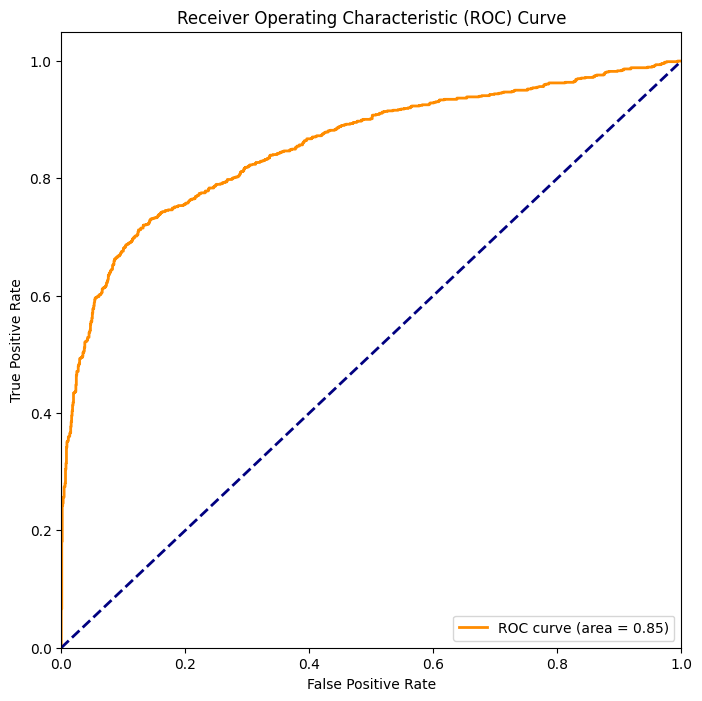

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming `combined_model` is your trained model and `X_test` contains your test data
# Make predictions
y_scores = combined_model.predict([X_test_padded, X_test_tfidf, X_test_bert, np.expand_dims(X_test_padded, axis=-1)])

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


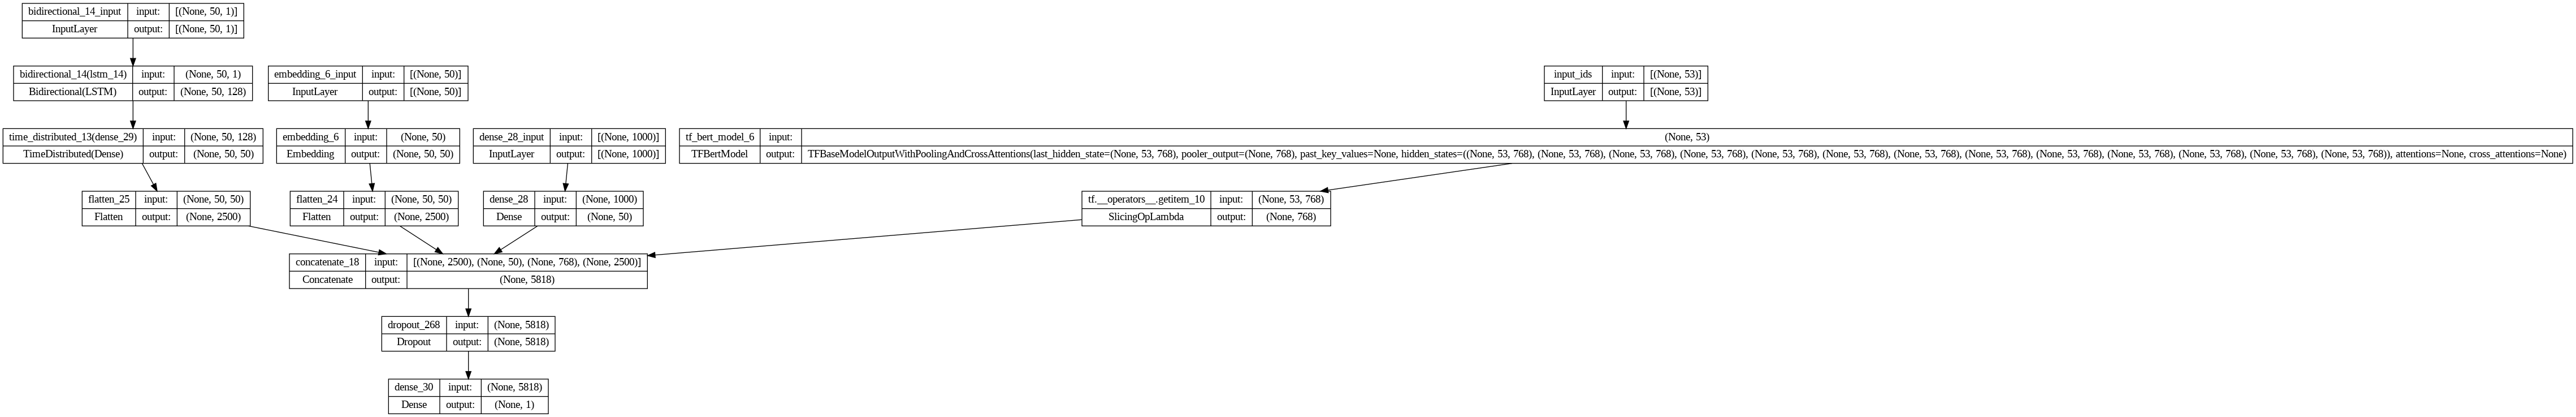

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(combined_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Bidirectional, LSTM, Dropout
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from transformers import BertTokenizer, TFBertModel
# from tqdm import tqdm

# # Assuming df2 is your DataFrame
# # Assuming 'text' is your feature, and 'target' is the target variable

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['target'], test_size=0.3, random_state=42)

# # Tokenize and pad sequences for word embeddings
# max_len = 50
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# X_train_sequences = tokenizer.texts_to_sequences(X_train)
# X_test_sequences = tokenizer.texts_to_sequences(X_test)
# X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
# X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

# # TF-IDF vectorization
# tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
# X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# # BERT tokenization
# tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
# X_train_bert = np.array([tokenizer_bert.encode(text, add_special_tokens=True) for text in tqdm(X_train)])
# X_test_bert = np.array([tokenizer_bert.encode(text, add_special_tokens=True) for text in tqdm(X_test)])

# # Pad BERT sequences
# max_len_bert = max(len(seq) for seq in np.concatenate([X_train_bert, X_test_bert], axis=0))
# X_train_bert = pad_sequences(X_train_bert, maxlen=max_len_bert, dtype="long", value=0, truncating="post", padding="post")
# X_test_bert = pad_sequences(X_test_bert, maxlen=max_len_bert, dtype="long", value=0, truncating="post", padding="post")

# # Build the word embedding model
# word_embedding_model = tf.keras.Sequential()
# word_embedding_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len))
# word_embedding_model.add(Flatten())

# # Build the TF-IDF model
# tfidf_model = tf.keras.Sequential()
# tfidf_model.add(Dense(50, input_dim=X_train_tfidf.shape[1], activation='relu'))

# # Build the BERT model
# bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
# input_ids = Input(shape=(max_len_bert,), dtype=tf.int32, name="input_ids")
# outputs = bert_model(input_ids)['last_hidden_state']
# bert_model = Model(inputs=input_ids, outputs=outputs)

# # Concatenate the outputs of all models
# concatenated_layer = Concatenate()([word_embedding_model.output, tfidf_model.output, bert_model.output[:, 0, :]])

# # Reshape to add a time dimension
# reshaped_layer = tf.expand_dims(concatenated_layer, axis=-2)

# # Bidirectional LSTM layer
# bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(reshaped_layer)

# # Flatten the output of the Bidirectional LSTM
# flattened_lstm = Flatten()(bi_lstm)

# # Additional layers
# dropout_layer = Dropout(0.5)(flattened_lstm)
# output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# # Create the combined model
# combined_model = tf.keras.Model(inputs=[word_embedding_model.input, tfidf_model.input, input_ids], outputs=output_layer)

# # Compile the model
# combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Display the model summary
# combined_model.summary()

# # Train the model
# combined_model.fit([X_train_padded, X_train_tfidf, X_train_bert], y_train, epochs=5, batch_size=32, validation_split=0.2)

# # Evaluate the model
# loss, accuracy = combined_model.evaluate([X_test_padded, X_test_tfidf, X_test_bert], y_test)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Get predictions on the test set
# y_pred = combined_model.predict([X_test_padded, X_test_tfidf, X_test_bert]).ravel()

# # Compute ROC curve and ROC area for each class
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()
